<a href="https://colab.research.google.com/github/devzohaib/Simple-Linear-Regression/blob/master/Linear_Regression_Sklearn_Keras_Single_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: Co2 Emission Predciton based on Engine Size 

In [107]:
# Require Libarary 
import pandas as pd

## Loading Dataset from the URL

In [108]:
url = 'https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/FuelConsumption.csv'
df = pd.read_csv(url)
df.shape,df.columns

((1067, 13),
 Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
        'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
        'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
        'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
       dtype='object'))

### We have 13 columns in our dataset WE will focus on 2 Variable (EngineSize) and (Co2 Emission) We will build a machine learning model to predict the ammount of CO2 emmison given the engine Size. 


In [109]:
X = (df.ENGINESIZE).to_numpy() 
Y = (df.CO2EMISSIONS).to_numpy()

type(X),type(Y)

(numpy.ndarray, numpy.ndarray)

### Let Visualize the relation between Engine Size and Co2 emisson 
we have X and Y 
as in the graph we can see that we have Clear Linear Relatioship menas , if engine size increase the ammount of Co2 also increase. 

In other words we can say that we can Build Linear Model for this Senerio. 


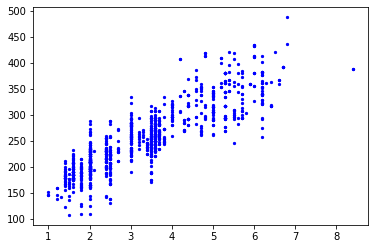

In [110]:
import matplotlib.pyplot as plt

plt.scatter(X,Y,c='b',s=5) # here c is color and s is size of dot

### WE have Engine Size in Variale X and CO2 emmsion in Y variable. Now we have to Split our data into Traning and Testing . 


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=999)
print("X_train :",X_train.shape)
print("y_train :",y_train.shape)
print("X_test :",X_test.shape)
print("Y_test :",y_test.shape)


X_train : (853,)
y_train : (853,)
X_test : (214,)
Y_test : (214,)


### Importing LinearRegressor form Sklearn


In [112]:
from sklearn.linear_model import LinearRegression
# Traning 
lreg = LinearRegression().fit(X_train.reshape(-1,1),y_train)
# Score method tell us how well the model approximate the traing data points. 
# An score of 1 indicates that the model perfectly fit the data.
score=lreg.score(X_train.reshape(-1,1),y_train)
print("Model Accuracy on Traning Data ",score)

# testing 
y_predict = lreg.predict(X_test.reshape(-1,1))

# cheeking the score of model how well it perform on unseen data 
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_predict) # we can say that model perform well on the 77% of total data 
print("Model Accouracy on Test Data   ",r2)
print("---------------------------------------------------")
print("Slope :",lreg.coef_)
print("Interc:",lreg.intercept_)

Model Accuracy on Traning Data  0.7623829889084579
Model Accouracy on Test Data    0.7700976201752513
---------------------------------------------------
Slope : [39.3531095]
Interc: 124.79671166546274


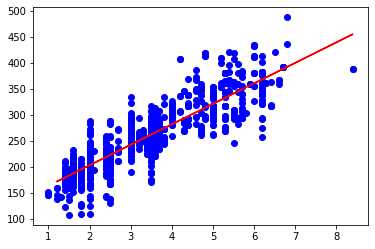

In [113]:
plt.scatter(X,Y,color='blue')
plt.plot(X_test,y_predict,'-r')

# Linear Model With Single Neuron -


In [114]:
#  require library
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [115]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train,y_train, epochs=30)

Epoch 1/30
27/27 [==============================] - 0s 1ms/step - loss: 7926.8979
Epoch 2/30
27/27 [==============================] - 0s 1ms/step - loss: 2393.8069
Epoch 3/30
27/27 [==============================] - 0s 1ms/step - loss: 2194.4038
Epoch 4/30
27/27 [==============================] - 0s 947us/step - loss: 2009.1461
Epoch 5/30
27/27 [==============================] - 0s 893us/step - loss: 1856.8414
Epoch 6/30
27/27 [==============================] - 0s 1ms/step - loss: 1729.0251
Epoch 7/30
27/27 [==============================] - 0s 1ms/step - loss: 1621.1285
Epoch 8/30
27/27 [==============================] - 0s 868us/step - loss: 1531.6757
Epoch 9/30
27/27 [==============================] - 0s 923us/step - loss: 1454.4659
Epoch 10/30
27/27 [==============================] - 0s 878us/step - loss: 1379.6040
Epoch 11/30
27/27 [==============================] - 0s 852us/step - loss: 1321.1847
Epoch 12/30
27/27 [==============================] - 0s 912us/step - loss: 1266.7831

In [116]:
y_pre = model.predict(X_test)

In [117]:
r2_score(y_test,y_pre)

0.761881164105503

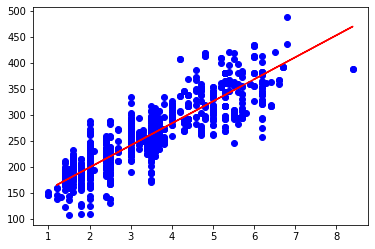

In [118]:
plt.scatter(X,Y,color='blue')
plt.plot(X_test,y_pre,'-r')

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[42.328953]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([114.70404], dtype=float32)>]